In [1]:
 # imports

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [12]:
norm_dict = {}
for idx, f in enumerate(files_3d):
    fn = filenames_3d[idx]
    data = xr.open_dataset(f, engine="cfgrib")
    name = varnames_3d[idx]
    var = data[name].values

    if fn in ["extra_3d_cli", "extra_3d_clw", "cli", "clw"]:
        norm_subdict = {
            "mean": np.mean(var, axis=1, where=var>0),
            "std": np.std(var, axis=1, where=var>0),
            "median": np.median(var, axis=1),
            "min": np.min(var, axis=1),
            "max": np.max(var, axis=1),
        }
    else:         
        norm_subdict = {
            "mean": np.mean(var, axis=1),
            "std": np.std(var, axis=1),
            "median": np.median(var, axis=1),
            "min": np.min(var, axis=1),
            "max": np.max(var, axis=1),
        }
    data.close()
    norm_dict[fn] = norm_subdict

for idx, f in enumerate(files_2d):
    fn = filenames_2d[idx]
    data = xr.open_dataset(f)
    for v in varnames_2d[idx]:
        var = data[v].values
        if v in ["rsut", "extra_2d_cllvi", "extra_2d_clivi", "extra_2d_prw"]:
            var = var[var>0]

        norm_subdict = {
            "mean": np.mean(var),
            "std": np.std(var),
            "median": np.median(var),
            "min": np.min(var),
            "max": np.max(var),
        }
        norm_dict[v] = norm_subdict
    data.close()
norm_dict = pd.DataFrame.from_dict(norm_dict)
norm_dict.to_pickle("norm_file_jsc.pkl")
norm_dict

Can't create file '/p/scratch/icon-a-ml/kazeroni1/experiments/dy32_02_p10d-aes-radiation_2004.04/dy32_02_p10d-aes-radiation_2004.04_extra_3d_cli_ml_20040401T030000Z.grb.923a8.idx'
Traceback (most recent call last):
  File "/p/project/icon-a-ml/mambaforge/envs/hafner1_ml_rad/lib/python3.10/site-packages/cfgrib/messages.py", line 522, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/p/project/icon-a-ml/mambaforge/envs/hafner1_ml_rad/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/p/project/icon-a-ml/mambaforge/envs/hafner1_ml_rad/lib/python3.10/site-packages/cfgrib/messages.py", line 488, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/p/scratch/icon-a-ml/kazeroni1/experiments/dy32_02_p10d-aes-radiation_2004.04/dy32_02_p10d-aes-radiation_2004.04_extra_3d_cli_ml_20040401T030000Z.grb.923a8.idx'
Can't read in

# Levante

In [ ]:
types = ["atm3d", "atm2d"]
exp = "exp"
base="/path/to/data/"
exp_base=f"{base}{exp}/{exp}"
vgrid = f"{exp_base}_vgrid_ml.nc"
files = [f"{exp_base}_{t}_ml_19800128T030000Z.nc" for t in types]
variables = ["ts_rad", "extra_3d_cli", "extra_3d_clw", "extra_3d_pfull", "extra_3d_ta","extra_3d_hus", "o3",
            "cosmu0", "extra_2d_albedo", "extra_2d_prw", "extra_2d_clivi", "extra_2d_cllvi", "rsut", 
            "rlut", "rsu", "rlu", "rsd", "rld", "q_rsw", "q_rlw", "rho", "hfls", "hfss", "daylght_frc",
            "rsds", "rsus", "rvds_dir","rvds_dif", "rpds_dir","rpds_dif", "rnds_dir","rnds_dif", "rlds", "rlus",
            "tend_ta_rsw", "tend_ta_rlw" ]

data = xr.open_mfdataset(files)
vgrid = xr.load_dataset(vgrid)
    
norm_dict = {}
for idx, v in enumerate(variables):
    var = data[v].squeeze().values
    
    s = var.shape
    print(v, s)
    
    if len(s)==2:

        if v in ["cli", "clw", "cl", "extra_3d_cli", "extra_3d_clw", "extra_3d_prw", "extra_3d_cl"]:
            norm_subdict = {
                "mean": np.nan_to_num(np.mean(var, axis=1, where=var>0).astype(np.float32)) ,
                "std": np.nan_to_num(np.std(var, axis=1, where=var>0).astype(np.float32)) ,
                "median": np.nan_to_num(np.median(var, axis=1).astype(np.float32)) ,
                "min": np.nan_to_num(np.min(var, axis=1).astype(np.float32)) ,
                "max": np.nan_to_num(np.max(var, axis=1).astype(np.float32)) ,
            }
        
        else:         
            norm_subdict = {
                "mean": np.mean(var, axis=1).astype(np.float32) ,
                "std": np.std(var, axis=1).astype(np.float32) ,
                "median": np.median(var, axis=1).astype(np.float32) ,
                "min": np.min(var, axis=1).astype(np.float32) ,
                "max": np.max(var, axis=1).astype(np.float32) ,
            }
    elif len(s)==1:
        if v in ["rsut", "extra_2d_prw", "extra_2d_clivi", "extra_2d_cllvi"]:
            var = var[var>0]
        

        norm_subdict = {
            "mean": np.mean(var).astype(np.float32) ,
            "std": np.std(var).astype(np.float32) ,
            "median": np.median(var).astype(np.float32) ,
            "min": np.min(var).astype(np.float32) ,
            "max": np.max(var).astype(np.float32) ,
        }
    norm_dict[v] = norm_subdict

var = vgrid["dzghalf"].values 
norm_subdict = {
            "mean": np.mean(var).astype(np.float32) ,
            "std": np.std(var).astype(np.float32) ,
            "median": np.median(var).astype(np.float32) ,
            "min": np.min(var).astype(np.float32) ,
            "max": np.max(var).astype(np.float32) ,
        }
norm_dict["dz"] = norm_subdict
lvl_mean = norm_dict["extra_3d_hus"]["mean"] +norm_dict["extra_3d_clw"]["mean"] +norm_dict["extra_3d_cli"]["mean"]
var_hus = np.where(norm_dict["extra_3d_hus"]["std"]>0,1/norm_dict["extra_3d_hus"]["std"],0)**2
var_clw = np.where(norm_dict["extra_3d_clw"]["std"]>0,1/norm_dict["extra_3d_hus"]["std"],0)**2
var_cli = np.where(norm_dict["extra_3d_cli"]["std"]>0,1/norm_dict["extra_3d_hus"]["std"],0)**2
lvl_std = np.where(var_hus+var_clw+var_cli>0, 1/np.sqrt(var_hus+var_clw+var_cli),0)
norm_subdict = {"mean": lvl_mean, 
                "std": lvl_std,
                "median":  norm_dict["extra_3d_hus"]["median"] +norm_dict["extra_3d_clw"]["median"] +norm_dict["extra_3d_cli"]["median"],
                "max":  norm_dict["extra_3d_hus"]["max"] +norm_dict["extra_3d_clw"]["max"] +norm_dict["extra_3d_cli"]["max"],
                "min":  norm_dict["extra_3d_hus"]["min"] +norm_dict["extra_3d_clw"]["min"] +norm_dict["extra_3d_cli"]["min"],
                }
norm_dict["h2o"] = norm_subdict
norm_dict["toa"] = {"mean": 1360, 
                "std": 1,
                "median":  1360,
                "max":  1,
                "min":  1,
                }
data.close()

norm_dict = pd.DataFrame.from_dict(norm_dict)
norm_dict.to_pickle("norm_file_extra.pkl")
norm_dict

# Tests/Plots

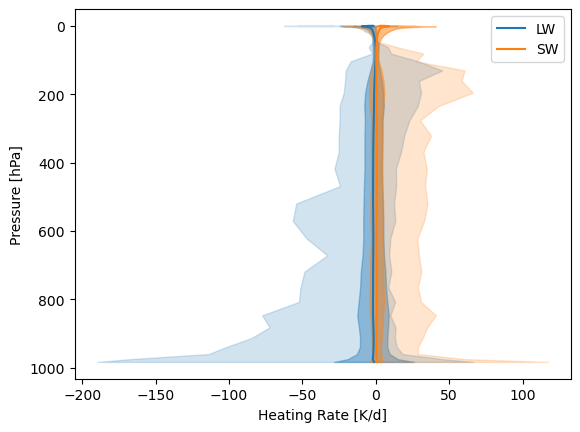

In [28]:
t=86400
plt.plot(norm_dict["tend_ta_rlw"]["mean"]*t, norm_dict["extra_3d_pfull"]["mean"]/100, label="LW")
plt.fill_betweenx(norm_dict["extra_3d_pfull"]["mean"]/100, norm_dict["tend_ta_rlw"]["min"]*t, norm_dict["tend_ta_rlw"]["max"]*t, color="C0", alpha=0.2)
plt.fill_betweenx(norm_dict["extra_3d_pfull"]["mean"]/100, norm_dict["tend_ta_rlw"]["mean"]*t-norm_dict["tend_ta_rlw"]["std"]*3*t, norm_dict["tend_ta_rlw"]["mean"]*t+norm_dict["tend_ta_rlw"]["std"]*3*t, color="C0", alpha=0.4)
plt.plot(norm_dict["tend_ta_rsw"]["mean"]*t, norm_dict["extra_3d_pfull"]["mean"]/100, label="SW")
plt.fill_betweenx(norm_dict["extra_3d_pfull"]["mean"]/100, norm_dict["tend_ta_rsw"]["min"]*t, norm_dict["tend_ta_rsw"]["max"]*t, color="C1", alpha=0.2)
plt.fill_betweenx(norm_dict["extra_3d_pfull"]["mean"]/100, norm_dict["tend_ta_rsw"]["mean"]*t-norm_dict["tend_ta_rsw"]["std"]*3*t, norm_dict["tend_ta_rsw"]["mean"]*t+norm_dict["tend_ta_rsw"]["std"]*3*t, color="C1", alpha=0.4)
plt.xlabel("Heating Rate [K/d]")
plt.legend()
plt.ylabel("Pressure [hPa]")
plt.gca().invert_yaxis()